In [1]:
from toolkit.main.simulator import InstrumentSimulator
from toolkit.defines.modelingsettings import ModelingSettings
from toolkit.defines.instrument import JWSTNirSpecIFU
import matplotlib.pyplot as plt

In [2]:
instrument = JWSTNirSpecIFU()

In [3]:
modeling_settings = ModelingSettings(exposure_time=1e-5, use_gpu=True, instrument=instrument)

In [4]:
data_path = r'/Users/wiebe/Documents/repos/toolkit/tests/test_data/datacube.nc'
sim = InstrumentSimulator(data_path)

In [5]:
psf = sim.get_clean_flux_at_detector(modeling_settings=modeling_settings)

--- Apple Silicon GPU detected. Running partially accelerated resampling (MLX + CPU). ---


In [10]:
spectrum_1d = sim.get_spatially_integrated_flux(modeling_settings=modeling_settings)
obs_1d = sim.get_spatially_integrated_observed_spectrum(modeling_settings=modeling_settings)

spectrum_2d = sim.get_wavelength_integrated_flux(modeling_settings=modeling_settings)
obs_2d = sim.get_wavelength_integrated_observed_spectrum(modeling_settings=modeling_settings)

/Users/wiebe/Documents/repos/toolkit/src/toolkit/modeling/noise_sources.py:61: UserWarning: Readout noise not implemented yet, defaulting to 0
  warnings.warn('Readout noise not implemented yet, defaulting to 0')
/Users/wiebe/Documents/repos/toolkit/src/toolkit/modeling/noise_sources.py:66: UserWarning: Baseline drift not implemented yet, defaulting to 0
  warnings.warn('Baseline drift not implemented yet, defaulting to 0')
/Users/wiebe/Documents/repos/toolkit/src/toolkit/modeling/noise_sources.py:61: UserWarning: Readout noise not implemented yet, defaulting to 0
  warnings.warn('Readout noise not implemented yet, defaulting to 0')
/Users/wiebe/Documents/repos/toolkit/src/toolkit/modeling/noise_sources.py:66: UserWarning: Baseline drift not implemented yet, defaulting to 0
  warnings.warn('Baseline drift not implemented yet, defaulting to 0')


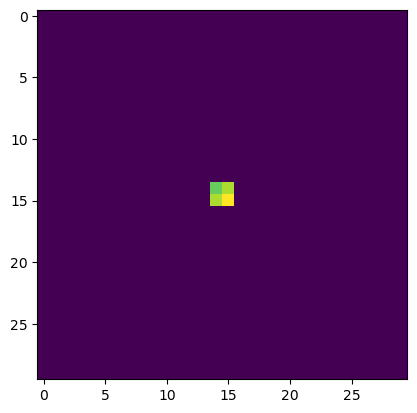

In [11]:
plt.figure()
plt.imshow(spectrum_2d)
plt.show()

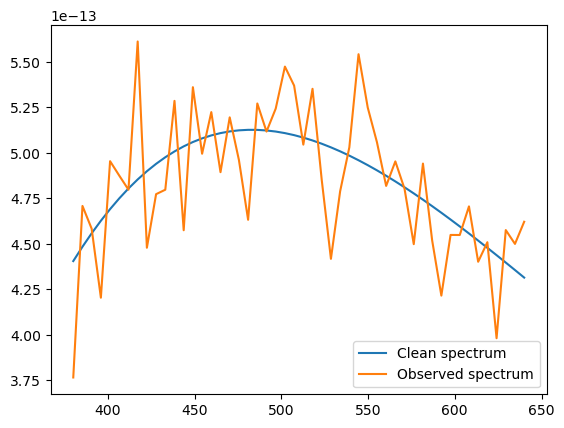

In [9]:
plt.figure()
plt.plot(spectrum_1d.wavelength, spectrum_1d, label='Clean spectrum')
plt.plot(obs_1d.wavelength, obs_1d, label='Observed spectrum')
plt.legend()
plt.show()